<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/AAI_prac_1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical 1(a): Implement and compare different state space search algorithms (A*, BFS, DFS) for solving planning problems.

Enter the start node: A
Enter the target node: L


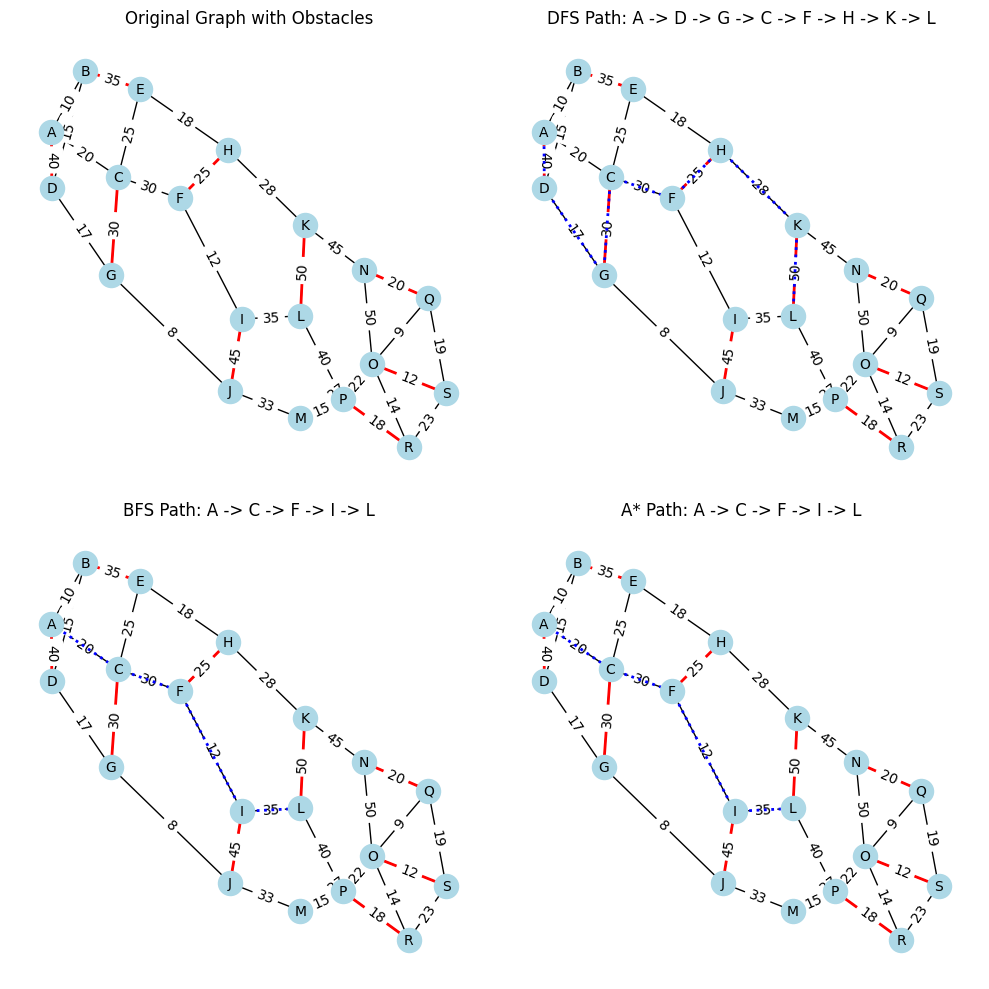

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import deque

# Define nodes and create the graph
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'H', 'G', 'R', 'Q', 'S']
G = nx.Graph()
G.add_nodes_from(nodes)

# Define edges with weights
edges_with_weights = [
    ('A', 'B', 10), ('A', 'C', 20), ('B', 'D', 15),
    ('C', 'E', 25), ('C', 'F', 30), ('F', 'I', 12),
    ('I', 'L', 35), ('L', 'P', 40), ('P', 'O', 22),
    ('E', 'H', 18), ('H', 'K', 28), ('K', 'N', 45),
    ('N', 'O', 50), ('D', 'G', 17), ('G', 'J', 8),
    ('J', 'M', 33), ('M', 'O', 27), ('O', 'R', 14),
    ('O', 'Q', 9), ('Q', 'S', 19), ('R', 'S', 23)
]
G.add_weighted_edges_from(edges_with_weights)

# Define static obstacle edges
obstacle_edges = [
    ('A', 'D', 40), ('B', 'E', 35), ('C', 'G', 30),
    ('F', 'H', 25), ('I', 'J', 45), ('L', 'K', 50),
    ('M', 'P', 15), ('N', 'Q', 20), ('O', 'S', 12),
    ('R', 'P', 18)
]
G.add_weighted_edges_from(obstacle_edges)

# Function to draw the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)
def draw_graph(ax, highlight_edges=None):
    ax.clear()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=obstacle_edges, edge_color='red', width=2, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, edge_color='blue', width=2, style='dotted', ax=ax)

# DFS Algorithm
def dfs(G, start, target):
    stack = [(start, [start])]
    visited = set()
    while stack:
        (vertex, path) = stack.pop()
        if vertex in visited:
            continue
        visited.add(vertex)
        for neighbor in G.neighbors(vertex):
            if neighbor in visited or (vertex, neighbor) in obstacle_edges:
                continue
            if neighbor == target:
                return path + [neighbor]
            stack.append((neighbor, path + [neighbor]))
    return None

# BFS Algorithm
def bfs(G, start, target):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        (vertex, path) = queue.popleft()
        if vertex in visited:
            continue
        visited.add(vertex)
        for neighbor in G.neighbors(vertex):
            if neighbor in visited or (vertex, neighbor) in obstacle_edges:
                continue
            if neighbor == target:
                return path + [neighbor]
            queue.append((neighbor, path + [neighbor]))
    return None

# A* Algorithm
def a_star(G, start, target):
    def heuristic(a, b):
        return abs(ord(a) - ord(b))
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, target), 0, start, []))
    visited = set()
    while open_set:
        _, cost, vertex, path = heapq.heappop(open_set)
        if vertex in visited:
            continue
        visited.add(vertex)
        new_path = path + [vertex]
        if vertex == target:
            return new_path
        for neighbor in G.neighbors(vertex):
            if neighbor in visited or (vertex, neighbor) in obstacle_edges:
                continue
            total_cost = cost + G[vertex][neighbor]['weight']
            heapq.heappush(open_set, (total_cost + heuristic(neighbor, target), total_cost, neighbor, new_path))
    return None

# Visualize results
def visualize_search(start, target):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    draw_graph(axs[0, 0])
    axs[0, 0].set_title('Original Graph with Obstacles')
    path_dfs = dfs(G, start, target)
    if path_dfs:
        dfs_edges = list(zip(path_dfs, path_dfs[1:]))
        draw_graph(axs[0, 1], highlight_edges=dfs_edges)
        axs[0, 1].set_title(f'DFS Path: {" -> ".join(path_dfs)}')
    path_bfs = bfs(G, start, target)
    if path_bfs:
        bfs_edges = list(zip(path_bfs, path_bfs[1:]))
        draw_graph(axs[1, 0], highlight_edges=bfs_edges)
        axs[1, 0].set_title(f'BFS Path: {" -> ".join(path_bfs)}')
    path_a_star = a_star(G, start, target)
    if path_a_star:
        a_star_edges = list(zip(path_a_star, path_a_star[1:]))
        draw_graph(axs[1, 1], highlight_edges=a_star_edges)
        axs[1, 1].set_title(f'A* Path: {" -> ".join(path_a_star)}')
    plt.tight_layout()
    plt.show()

# Get start and target nodes from user
start_node = input("Enter the start node: ")
target_node = input("Enter the target node: ")
visualize_search(start_node, target_node)
